In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
from pandas.plotting import parallel_coordinates
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
import seaborn as sn
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA

In [2]:
OP_df = pd.read_csv('btc_option_data.csv')
OP_df = OP_df.dropna()
OP_df.head(1)

,underlying_price,underlying_index,timestamp,open_interest,min_price,max_price,mark_price,mark_iv,last_price,interest_rate,...,stats.price_change,stats.low,stats.high,greeks.vega,greeks.theta,greeks.rho,greeks.gamma,greeks.delta,settlement_period,settlement_price
10,47793.03,index_price,1613068627276,583.9,0.15,0.5495,0.349553,250.0,0.3498,0.0,...,0.0,0.3498,0.3498,24.67116,-211.84041,9.04856,0.00001,0.82425,month,0.32


In [3]:
data = OP_df
data = data.drop(['underlying_index'], axis = 1)
data = data.drop(['settlement_period'], axis = 1)
data = data.drop(['instrument_name'], axis = 1)
data = data.drop(['bids'], axis = 1)
data = data.drop(['asks'], axis = 1)
data.head(1)

,underlying_price,timestamp,open_interest,min_price,max_price,mark_price,mark_iv,last_price,interest_rate,index_price,...,stats.volume,stats.price_change,stats.low,stats.high,greeks.vega,greeks.theta,greeks.rho,greeks.gamma,greeks.delta,settlement_price
10,47793.03,1613068627276,583.9,0.15,0.5495,0.349553,250.0,0.3498,0.0,47793.03,...,25.0,0.0,0.3498,0.3498,24.67116,-211.84041,9.04856,0.00001,0.82425,0.32


In [15]:
OP_df.columns

Index(['underlying_price', 'underlying_index', 'timestamp', 'open_interest',
       'min_price', 'max_price', 'mark_price', 'mark_iv', 'last_price',
       'interest_rate', 'instrument_name', 'index_price', 'change_id', 'bids',
       'bid_iv', 'best_bid_price', 'best_bid_amount', 'best_ask_price',
       'best_ask_amount', 'asks', 'ask_iv', 'stats.volume',
       'stats.price_change', 'stats.low', 'stats.high', 'greeks.vega',
       'greeks.theta', 'greeks.rho', 'greeks.gamma', 'greeks.delta',
       'settlement_period', 'settlement_price'],
      dtype='object')

In [35]:
len(OP_df)

354

No handles with labels found to put in legend.


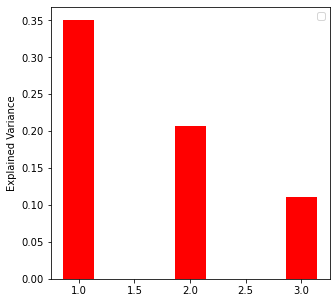

In [3]:
import statistics
from numpy import asarray
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#PCA Variance plot

def Plot_CVR(OP_df):
    y = ["OPTION"]
    x = []
    data = OP_df
    data = data.drop(['underlying_index'], axis = 1)
    data = data.drop(['settlement_period'], axis = 1)
    data = data.drop(['instrument_name'], axis = 1)
    data = data.drop(['bids'], axis = 1)
    data = data.drop(['asks'], axis = 1)
    
    scaler = MinMaxScaler()
    sc = scaler.fit_transform(data)
    pca = PCA(n_components=3)
    pca.fit(sc)
    vc = pca.explained_variance_ratio_
    
    import matplotlib.pyplot as plt 
    
    fig=plt.figure(figsize=(5,5))
    bar1 = plt.bar(1, vc[0], color= 'r',width = .28)
    bar1 = plt.bar(2, vc[1], color= 'r', width = .28)
    bar1 = plt.bar(3, vc[2], color= 'r', width = .28)
    
    
    plt.legend( )
    plt.ylabel("Explained Variance")
    plt.show()

Plot_CVR(OP_df)

C:\Users\chsha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


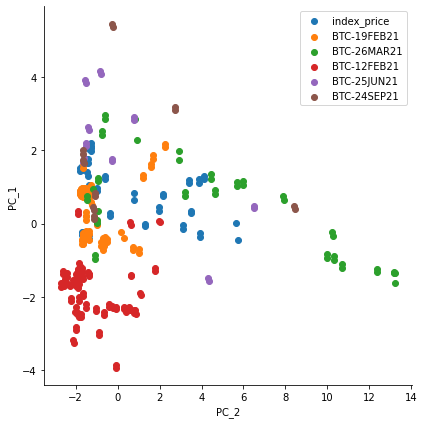

In [44]:
from sklearn import preprocessing

data = OP_df

l = OP_df['underlying_index']

data = OP_df
data = data.drop(['underlying_index'], axis = 1)
data = data.drop(['settlement_period'], axis = 1)
data = data.drop(['instrument_name'], axis = 1)
data = data.drop(['bids'], axis = 1)
data = data.drop(['asks'], axis = 1)

norm = StandardScaler().fit_transform(data)
pca = PCA(n_components = 2)
n = pca.fit_transform(norm)

np.shape(n)

tsne_data = n

tsne_data = np.vstack((tsne_data.T, l)).T

tsne_df = pd.DataFrame(data = tsne_data,columns =("PC_2", "PC_1", "label"))
 
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter,"PC_2", "PC_1")
plt.legend()
 
plt.show()

In [21]:
len(OP_df)

354

In [14]:
# n = number of bad guys

n = 10
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import spatial
from sklearn.svm import LinearSVR
import statistics
from numpy import asarray
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

OP_df = pd.read_csv('btc_option_data.csv')
OP_df = OP_df.dropna()
data = OP_df
data = data.drop(['underlying_index'], axis = 1)
data = data.drop(['settlement_period'], axis = 1)
data = data.drop(['instrument_name'], axis = 1)
data = data.drop(['bids'], axis = 1)
data = data.drop(['asks'], axis = 1)
OOP_df = data
OOP_df = OOP_df.drop(['mark_iv'], axis = 1)

from sklearn.model_selection import train_test_split

X = StandardScaler().fit_transform ( OOP_df )
Y = StandardScaler().fit_transform  ( np.array ( data['mark_iv'] ).reshape(-1, 1) ).ravel()

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=47)
X_train_tr, X_train_ts, Y_train_tr, Y_train_ts = train_test_split( X_train, Y_train, test_size=0.25, random_state=41)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
regr = make_pipeline(StandardScaler(), SVR(C=5,kernel='rbf', epsilon=0.2))
regr.fit(X_train, Y_train)
from sklearn.metrics import mean_squared_error
pred= regr.predict(X_test)
acc = mean_squared_error(Y_test, pred)


# Datagen Function

def datagen():
    
    OP_df = pd.read_csv('btc_option_data.csv')
    OP_df = OP_df.dropna()
    data = OP_df
    data = data.drop(['underlying_index'], axis = 1)
    data = data.drop(['settlement_period'], axis = 1)
    data = data.drop(['instrument_name'], axis = 1)
    data = data.drop(['bids'], axis = 1)
    data = data.drop(['asks'], axis = 1)
    OOP_df = data
    OOP_df = OOP_df.drop(['mark_iv'], axis = 1)

    # Standard Scaler
    
    X = StandardScaler().fit_transform ( OOP_df )
    
    
    Y = StandardScaler().fit_transform  ( np.array ( data['mark_iv'] ).reshape(-1, 1).reshape(-1, 1) ).ravel()

    # Train Test
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=47)
    
    #Train Tran and Train Test
    
    X_train_tr, X_train_ts, Y_train_tr, Y_train_ts = train_test_split( X_train, Y_train, test_size=0.25, random_state=41)
    
    return X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test

# SVM predict on test

def svm():
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVR
    regr = make_pipeline(StandardScaler(), SVR(C=1,kernel='linear', epsilon=0.2))
    regr.fit(X_train, Y_train)
    
    pred= regr.predict(X_test)
    mse = mean_squared_error(Y_test, pred)
    
    print(mse)
    r = r2_score(Y_test, pred)
    return mse,r,regr

# HL

def hl(regr,sv,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test):
    
    test_res = regr.predict(X_train_ts)
    errors = []
    
    # Looking for bad guys
    
    for i in range(0,len(X_train_ts)):
        err = abs ( test_res[i] - Y_train_ts[i] )
        errors.append(err)
    
    errors = np.array(errors)

    idx = (-errors).argsort()[:n]

    bad = np.array( X_train_ts)[idx]

    #Checking for neighbours KNN KDTress based
    
    neib = []
    for i in range(0,len(bad)):
        distance,index = spatial.KDTree(X_test).query(bad[i])
        neib.append(index)
        
    # Removing neighbours
    
    X_test_bad = np.array( X_test)[neib]
    Y_test_bad = np.array( Y_test)[neib]

    
    X_test = np.delete( X_test,neib, axis=0)
    Y_test = np.delete( Y_test,neib, axis=0)
    
    #New clean train data
    xt = np.concatenate((X_train_tr,X_train_ts), axis=0)
    yt = np.concatenate((Y_train_tr,Y_train_ts), axis=0)
    
    #Training. Here sv is a parameter and can be changed.
    regr = sv()
    regr.fit(xt, yt)
    pred= regr.predict(X_test)
    mse = mean_squared_error(Y_test, pred)
    r = r2_score(Y_test, pred)
    return mse,r,X_test_bad,Y_test_bad,bad

# SVM regression

def svr():
    regr = make_pipeline(StandardScaler(), SVR(C=1,kernel='linear', epsilon=0.2))
    return regr

# Plot for MSE

def plot1(s,m1,m2):
    
    fig=plt.figure(figsize=(7,4))
    bar2 = plt.bar(s +' MSE', m1 , color= 'r', width = .28)
    bar3 = plt.bar('HL MSE', m2 , color= 'b',width = .28)
    
    plt.legend( (bar2,bar3), ( m1,m2) )
    plt.ylabel("MSE")
    plt.show()

def plot2(s,r1,r2):
    bar4 = plt.bar(s +' R2', r1 , color= 'r', width = .28)
    bar5 = plt.bar('HL R2', r2 , color= 'b',width = .28)
    
    plt.legend( (bar4,bar5), ( r1,r2) )
    plt.ylabel("R2 Error")
    plt.show()

#Get result for each bad point for adaptive learning

from scipy import spatial
def get_res(i,sv):
    
    # Create custom training set
    
    neib = []
    for i in range(0,len(bad)):
        distance,index = spatial.KDTree(X_train).query(bad[i])
        neib.append(index)
    nei = np.array( X_train[index]).reshape(1,26)
    nei_y = np.array( Y_train[index]).reshape(1,)
    xt = np.concatenate((X_train_ts,nei), axis=0)
    yt = np.concatenate((Y_train_ts,nei_y), axis=0)
    regr = sv()
    regr.fit(xt, yt)
    p = regr.predict(X_test_bad[i].reshape(1,26))
    return p

# Main adaptive Learning function with plot

def adapt(sv):
    
    pred_bad = np.array([])
    for i in range(0,len(X_test_bad)):
        k = get_res(i,sv)
        pred_bad = np.concatenate((pred_bad,k),axis = 0)
    p2 = regr.predict(X_test_bad)
    mse1 = mean_squared_error(Y_test_bad, pred_bad)
    mse2 = mean_squared_error(Y_test_bad, p2)
    
    bar4 = plt.bar("Classifier Result",mse2 , color= 'r', width = .28)
    bar5 = plt.bar('Adaptive Learning', mse1, color= 'b',width = .28)
    
    plt.legend( (bar4,bar5), ( mse2,mse1) )
    plt.ylabel("MSE Error")
    plt.show()

0.38303457783569006


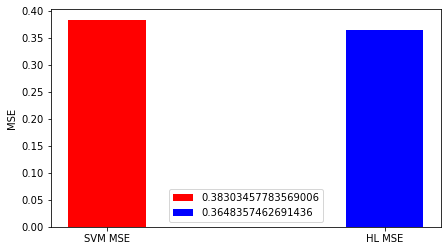

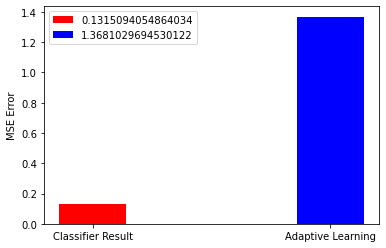

In [5]:
#SVM

datagen()
m1,r1,reg = svm()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,svr,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("SVM",m1,m2)
adapt(svr)

0.06648556876646226


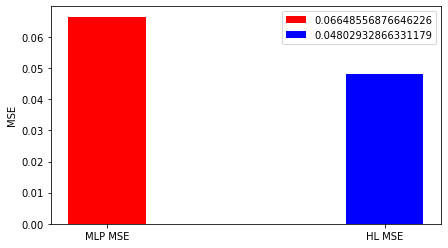

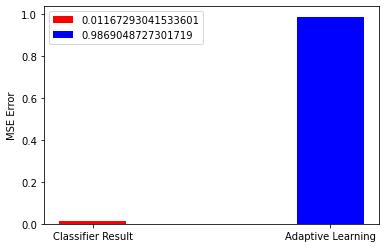

In [6]:
def mlp():
    from sklearn.neural_network import MLPRegressor
    from sklearn.datasets import make_regression
    regr= MLPRegressor(solver='lbfgs', alpha=1e-7, hidden_layer_sizes=(10,), random_state=1, max_iter =1e7)
    regr.fit(X_train, Y_train)
    
    pred= regr.predict(X_test)
    mse = mean_squared_error(Y_test, pred)
    
    print(mse)
    r = r2_score(Y_test, pred)
    return mse,r,regr

def mlp_p():
    from sklearn.neural_network import MLPRegressor
    from sklearn.datasets import make_regression
    regr= MLPRegressor(solver='lbfgs', alpha=1e-7, hidden_layer_sizes=(10,), random_state=1, max_iter =1e7)
    
    return regr

#MLP 

datagen()
m1,r1,reg = mlp()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,mlp_p,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("MLP",m1,m2)
#plot2("SVM",r1,r2)
adapt(mlp_p)

0.1210785663308083


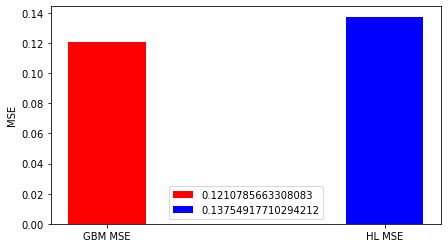

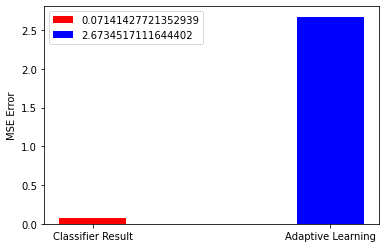

In [7]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
def gdr():
    regr=  GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=20, random_state=0).fit(X_train, Y_train)
    
    pred= regr.predict(X_test)
    mse = mean_squared_error(Y_test, pred)
    
    print(mse)
    r = r2_score(Y_test, pred)
    return mse,r,regr

def gdr_p():
    regr=  GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=20, random_state=0)
    
    return regr

#Gradient Boosting

datagen()
m1,r1,reg = gdr()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,gdr_p,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("GBM",m1,m2)
#plot2("SVM",r1,r2)
adapt(gdr_p)

0.01817319047408876


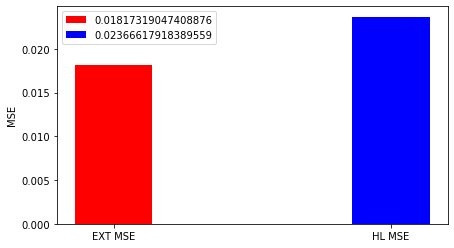

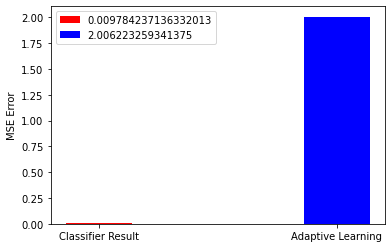

In [8]:
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor

def ext():
    regr=  ExtraTreesRegressor(n_estimators=100, random_state=0).fit( X_train, Y_train)
    pred= regr.predict(X_test)
    mse = mean_squared_error(Y_test, pred)
    print(mse)
    r = r2_score(Y_test, pred)
    return mse,r,regr

def ext_p():
    regr=  ExtraTreesRegressor(n_estimators=100, random_state=0)
    return regr

#Extra  Tree

datagen()
m1,r1,reg = ext()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,ext_p,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("EXT",m1,m2)
#plot2("SVM",r1,r2)
adapt(ext_p)

9/9 [==============================] - 0s 2ms/step - loss: 0.9089 - accuracy: 0.0000e+00
0.8155253951695901
9/9 [==============================] - 0s 2ms/step - loss: 0.9864 - accuracy: 0.0000e+00


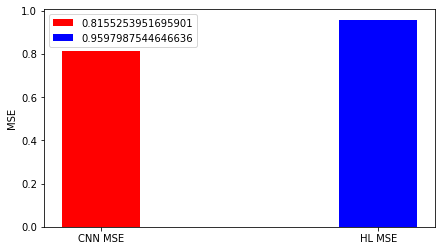

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

def hl(regr,sv,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test):
    
    test_res = regr.predict(X_train_ts)
    errors = []
    
    # Looking for bad guys
    
    for i in range(0,len(X_train_ts)):
        err = abs ( test_res[i] - Y_train_ts[i] )
        errors.append(err)
    
    errors = np.array(errors)

    idx = (-errors).argsort()[:n]

    bad = np.array( X_train_ts)[idx]

    #Checking for neighbours KNN KDTress based
    
    neib = []
    for i in range(0,len(bad)):
        distance,index = spatial.KDTree(X_test).query(bad[i])
        neib.append(index)
        

    
    X_test = np.delete( X_test,neib, axis=0)
    Y_test = np.delete( Y_test,neib, axis=0)
    
    #New clean train data
    xt = np.concatenate((X_train_tr,X_train_ts), axis=0)
    yt = np.concatenate((Y_train_tr,Y_train_ts), axis=0)
    
    #Training. Here sv is a parameter and can be changed.
    regr = sv()
    regr.fit(xt, yt)
    pred= regr.predict(X_test)
    mse = mean_squared_error(Y_test, pred)
    r = r2_score(Y_test, pred)
    return mse,r,X_test_bad,Y_test_bad,bad



def cnn():
    model = Sequential()
    model.add(Conv1D(16, kernel_size=3,  activation='relu', input_shape=(26,1)))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    model.fit( X_train, Y_train, epochs=1)
    regr= model
    pred= regr.predict(X_test)
    mse = mean_squared_error(Y_test, pred)
    print(mse)
    r = r2_score(Y_test, pred)
    return mse,r,regr

def cnn_p():
    model = Sequential()
    model.add(Conv1D(16, kernel_size=3,  activation='relu', input_shape=(26,1)))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

#CNN

datagen()
m1,r1,reg = cnn()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,cnn_p,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("CNN",m1,m2)

In [18]:
#The next on is for feature interpolation on SVM, MLP, GBM, EXT both HL and Adaptive Learning

0.38303457783569006


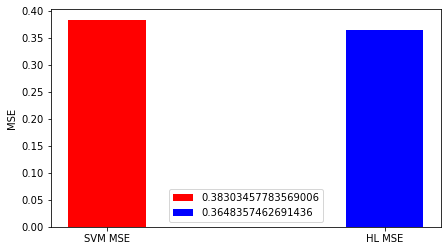

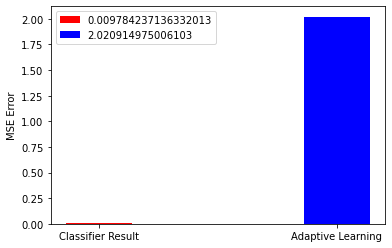

0.06648556876646226


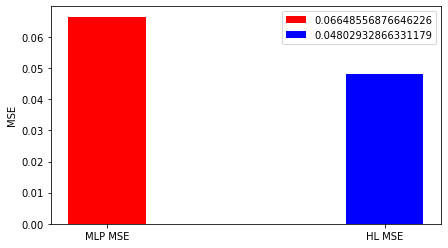

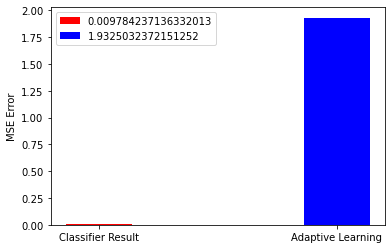

0.1210785663308083


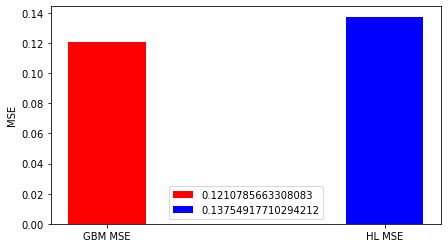

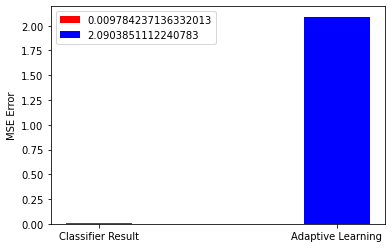

0.01817319047408876


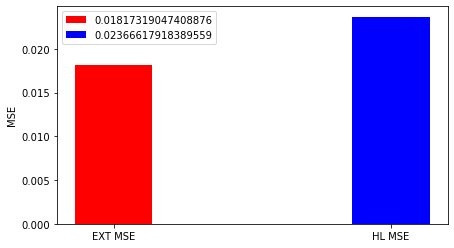

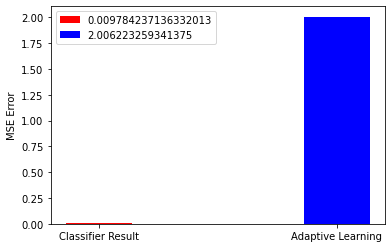

In [19]:
n = 10

#Features
def datagen2():
    
    OP_df = pd.read_csv('btc_option_data.csv')
    OP_df = OP_df.dropna()
    data = OP_df
    data = data.drop(['underlying_index'], axis = 1)
    data = data.drop(['settlement_period'], axis = 1)
    data = data.drop(['instrument_name'], axis = 1)
    data = data.drop(['bids'], axis = 1)
    data = data.drop(['asks'], axis = 1)
    data["kurt"] = data.kurtosis(axis = 1, skipna = True)
    data = data.dropna()
    data["skew"] = data.skew(axis = 1, skipna = True)
    data = data.dropna()
    data["in"] = data["underlying_price"] - data["last_price"]
    OOP_df = data
    OOP_df = OOP_df.drop(['mark_iv'], axis = 1)

    X = StandardScaler().fit_transform ( OOP_df )
    Y = StandardScaler().fit_transform  ( np.array ( data['mark_iv'] ).reshape(-1, 1).reshape(-1, 1) ).ravel()

    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=47)
    X_train_tr, X_train_ts, Y_train_tr, Y_train_ts = train_test_split( X_train, Y_train, test_size=0.25, random_state=41)
    
    return X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test

#SVM
datagen2()
m1,r1,reg = svm()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,svr,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("SVM",m1,m2)
#plot2("SVM",r1,r2)
adapt(svr)


#MLP

datagen2()
m1,r1,reg = mlp()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,mlp_p,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("MLP",m1,m2)
#plot2("SVM",r1,r2)
adapt(mlp_p)


#GBM
datagen2()
m1,r1,reg = gdr()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,gdr_p,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("GBM",m1,m2)
#plot2("SVM",r1,r2)
adapt(gdr_p)


#Extra
datagen2()
m1,r1,reg = ext()
m2,r2,X_test_bad,Y_test_bad,bad = hl(reg,ext_p,n,X_train_tr, X_train_ts, Y_train_tr, Y_train_ts,X_train, X_test, Y_train, Y_test)
plot1("EXT",m1,m2)
#plot2("SVM",r1,r2)
adapt(ext_p)


0.1417467133718873

In [53]:
n = 10

#Get nearest for nearest neighbours based on distance

def getNearest(x, p,ne) :
    err = distance(x,p[0])
    z = 0
    res = 0
    n = np.array(ne)
    for i in range(1,len(p)):
        if((i in n)):
            z = i
        else:
            e = distance(x,p[i])
            if(e < err ):
                res = i
    return res

#Gaussian

def distance(p1,p2):
    mse = np.linalg.norm( np.array(p1) - np.array(p2)  )
    return mse

points = [[0,10], [1,4], [2,3], [3,5],[2,1.1], [4,12]]
x = [2,1]
ne = [1,2,3]
r = getNearest(x, points,ne)
r
n = 100
OP_df = pd.read_csv('btc_option_data.csv')
OP_df = OP_df.dropna()
data = OP_df
data = data.drop(['underlying_index'], axis = 1)
data = data.drop(['settlement_period'], axis = 1)
data = data.drop(['instrument_name'], axis = 1)
data = data.drop(['bids'], axis = 1)
data = data.drop(['asks'], axis = 1)
OOP_df = data
OOP_df = OOP_df.drop(['mark_iv'], axis = 1)
from sklearn.model_selection import train_test_split

X = StandardScaler().fit_transform ( OOP_df )
Y = StandardScaler().fit_transform  ( np.array ( data['mark_iv'] ).reshape(-1, 1) ).ravel()

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=47)
X_train_tr, X_train_ts, Y_train_tr, Y_train_ts = train_test_split( X_train, Y_train, test_size=0.25, random_state=41)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
regr = make_pipeline(StandardScaler(), SVR(C=5,kernel='rbf', epsilon=0.2))
regr.fit(X_train, Y_train)
from sklearn.metrics import mean_squared_error
pred= regr.predict(X_test)
acc = mean_squared_error(Y_test, pred)
acc

0.13188576725362924

In [54]:
#HL by distance gaussian

test_res = regr.predict(X_train_ts)
errors = []
for i in range(0,len(X_train_ts)):
    err = abs ( test_res[i] - Y_train_ts[i] )
    errors.append(err)
    
errors = np.array(errors)

idx = (-errors).argsort()[:n]

bad = np.array( X_train_ts)[idx]


from scipy import spatial
neib = []
for i in range(0,len(bad)):
    index = getNearest( bad[i], X_test,neib)
    neib.append(index)
    
X_test_bad = np.array( X_test)[neib]
Y_test_bad = np.array( Y_test)[neib]

X_test = np.delete( X_test,neib, axis=0)
Y_test = np.delete( Y_test,neib, axis=0)


xt = np.concatenate((X_train_tr,X_train_ts), axis=0)
yt = np.concatenate((Y_train_tr,Y_train_ts), axis=0)
regr = make_pipeline(StandardScaler(), SVR(C=5,kernel='rbf', epsilon=0.2))
regr.fit(xt, yt)
pred= regr.predict(X_test)
ghacc = mean_squared_error(Y_test, pred)
#Kernel linear*Tghacc

0.09907570013899332

In [55]:

def cosine(X, Y):
    Y= Y.T
    return X.dot(Y)*np.tanh(X.dot(Y))

def getNearest(x, p,ne) :
    err = distance(x,p[0])
    z = 0
    res = 0
    n = np.array(ne)
    for i in range(1,len(p)):
        if((i in n)):
            z = i
        else:
            e = distance(x,p[i])
            if(e < err ):
                res = i
    return res
def distance(p1,p2):
    x = np.array(p1)
    y = np.array(p2)  
    return cosine(x,y)

points = [[0,10], [1,4], [2,3], [3,5],[2,1.1], [4,12]]
x = [2,1]
ne = [1,2,3]
r = getNearest(x, points,ne)
r
n = 100
OP_df = pd.read_csv('btc_option_data.csv')
OP_df = OP_df.dropna()
data = OP_df
data = data.drop(['underlying_index'], axis = 1)
data = data.drop(['settlement_period'], axis = 1)
data = data.drop(['instrument_name'], axis = 1)
data = data.drop(['bids'], axis = 1)
data = data.drop(['asks'], axis = 1)
OOP_df = data
OOP_df = OOP_df.drop(['mark_iv'], axis = 1)
from sklearn.model_selection import train_test_split

X = StandardScaler().fit_transform ( OOP_df )
Y = StandardScaler().fit_transform  ( np.array ( data['mark_iv'] ).reshape(-1, 1) ).ravel()

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=47)
X_train_tr, X_train_ts, Y_train_tr, Y_train_ts = train_test_split( X_train, Y_train, test_size=0.25, random_state=41)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
regr = make_pipeline(StandardScaler(), SVR(C=5,kernel='rbf', epsilon=0.2))
regr.fit(X_train, Y_train)
from sklearn.metrics import mean_squared_error
pred= regr.predict(X_test)
acc = mean_squared_error(Y_test, pred)
acc

0.13188576725362924

In [56]:
test_res = regr.predict(X_train_ts)
errors = []
for i in range(0,len(X_train_ts)):
    err = abs ( test_res[i] - Y_train_ts[i] )
    errors.append(err)
    
errors = np.array(errors)

idx = (-errors).argsort()[:n]

bad = np.array( X_train_ts)[idx]


from scipy import spatial
neib = []
for i in range(0,len(bad)):
    index = getNearest( bad[i], X_test,neib)
    neib.append(index)
    
X_test_bad = np.array( X_test)[neib]
Y_test_bad = np.array( Y_test)[neib]

X_test = np.delete( X_test,neib, axis=0)
Y_test = np.delete( Y_test,neib, axis=0)


xt = np.concatenate((X_train_tr,X_train_ts), axis=0)
yt = np.concatenate((Y_train_tr,Y_train_ts), axis=0)
regr = make_pipeline(StandardScaler(), SVR(C=5,kernel='rbf', epsilon=0.2))
regr.fit(xt, yt)
pred= regr.predict(X_test)
khacc = mean_squared_error(Y_test, pred)
khacc

0.07960614016602847

In [57]:
def cosine(X, Y):
    Y= Y.T
    return X.dot(Y)*np.tanh(X.dot(Y))

def getNearest(x, p,ne) :
    err = distance(x,p[0])
    z = 0
    res = 0
    n = np.array(ne)
    for i in range(1,len(p)):
        if((i in n)):
            z = i
        else:
            e = distance(x,p[i])
            if(e < err ):
                res = i
    return res
def distance(p1,p2):
    x = np.array(p1)
    y = np.array(p2)  
    return cosine(x,y)

points = [[0,10], [1,4], [2,3], [3,5],[2,1.1], [4,12]]
x = [2,1]
ne = [1,2,3]
r = getNearest(x, points,ne)
r
n = 100
OP_df = pd.read_csv('btc_option_data.csv')
OP_df = OP_df.dropna()
data = OP_df
data = data.drop(['underlying_index'], axis = 1)
data = data.drop(['settlement_period'], axis = 1)
data = data.drop(['instrument_name'], axis = 1)
data = data.drop(['bids'], axis = 1)
data = data.drop(['asks'], axis = 1)
OOP_df = data
OOP_df = OOP_df.drop(['mark_iv'], axis = 1)
from sklearn.model_selection import train_test_split

X = StandardScaler().fit_transform ( OOP_df )
Y = StandardScaler().fit_transform  ( np.array ( data['mark_iv'] ).reshape(-1, 1) ).ravel()

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=47)
X_train_tr, X_train_ts, Y_train_tr, Y_train_ts = train_test_split( X_train, Y_train, test_size=0.25, random_state=41)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
regr = make_pipeline(StandardScaler(), SVR(C=5,kernel='rbf', epsilon=0.2))
regr.fit(X_train, Y_train)
from sklearn.metrics import mean_squared_error
pred= regr.predict(X_test)
acc = mean_squared_error(Y_test, pred)
acc

0.13188576725362924

In [58]:
test_res = regr.predict(X_train_ts)
errors = []
for i in range(0,len(X_train_ts)):
    err = abs ( test_res[i] - Y_train_ts[i] )
    errors.append(err)
    
errors = np.array(errors)

idx = (-errors).argsort()[:n]

bad = np.array( X_train_ts)[idx]


from scipy import spatial
neib = []
for i in range(0,len(bad)):
    distance,index = spatial.KDTree(X_test).query(bad[i])
    neib.append(index)

neib = list(set(neib))    
X_test_bad = np.array( X_test)[neib]
Y_test_bad = np.array( Y_test)[neib]

X_test = np.delete( X_test,neib, axis=0)
Y_test = np.delete( Y_test,neib, axis=0)
xt = np.concatenate((X_train_tr,X_train_ts), axis=0)
yt = np.concatenate((Y_train_tr,Y_train_ts), axis=0)
regr = make_pipeline(StandardScaler(), SVR(C=5,kernel='rbf', epsilon=0.2))
regr.fit(xt, yt)
pred= regr.predict(X_test)
hacc = mean_squared_error(Y_test, pred)
hacc

0.18843022951069435

No handles with labels found to put in legend.


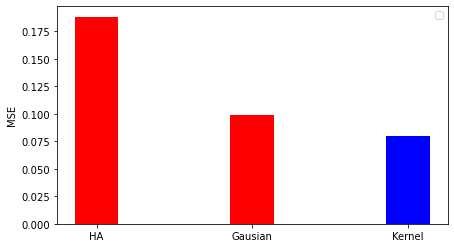

In [59]:
import statistics
from numpy import asarray
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
    
fig=plt.figure(figsize=(7,4))
bar4 = plt.bar("HA", hacc, color= 'r', width = .28)
bar2 = plt.bar("Gausian", ghacc, color= 'r', width = .28)
bar3 = plt.bar("Kernel", khacc, color= 'b',width = .28)
    
plt.legend( (bar4, bar2,bar3), ('HA','Gausian','Kernel') )
plt.ylabel("MSE")
plt.legend()
plt.show()

0.13188576725362924

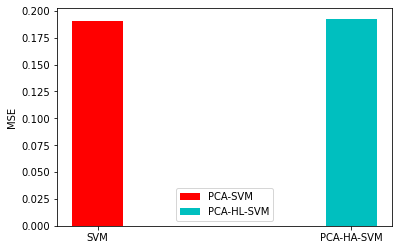

In [64]:
n = 50

OP_df = pd.read_csv('btc_option_data.csv')
OP_df = OP_df.dropna()
data = OP_df
data = data.drop(['underlying_index'], axis = 1)
data = data.drop(['settlement_period'], axis = 1)
data = data.drop(['instrument_name'], axis = 1)
data = data.drop(['bids'], axis = 1)
data = data.drop(['asks'], axis = 1)
OOP_df = data
OOP_df = OOP_df.drop(['mark_iv'], axis = 1)

norm = StandardScaler().fit_transform(OOP_df)
pca = PCA()
nn = pca.fit_transform(norm)
from sklearn.model_selection import train_test_split
X = nn

X = StandardScaler().fit_transform ( OOP_df )
Y = StandardScaler().fit_transform  ( np.array ( data['mark_iv'] ).reshape(-1, 1) ).ravel()

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, random_state=47)
X_train_tr, X_train_ts, Y_train_tr, Y_train_ts = train_test_split( X_train, Y_train, test_size=0.25, random_state=41)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
regr = make_pipeline(StandardScaler(), SVR(C=1,kernel='rbf', epsilon=0.2))
regr.fit(X_train, Y_train)
from sklearn.metrics import mean_squared_error
pred= regr.predict(X_test)
acc = mean_squared_error(Y_test, pred)
test_res = regr.predict(X_train_ts)
errors = []
for i in range(0,len(X_train_ts)):
    err = abs ( test_res[i] - Y_train_ts[i] )
    errors.append(err)
    
errors = np.array(errors)

idx = (-errors).argsort()[:n]

bad = np.array( X_train_ts)[idx]


from scipy import spatial
neib = []
for i in range(0,len(bad)):
    distance,index = spatial.KDTree(X_test).query(bad[i])
    neib.append(index)

neib = list(set(neib))    
X_test_bad = np.array( X_test)[neib]
Y_test_bad = np.array( Y_test)[neib]

X_test = np.delete( X_test,neib, axis=0)
Y_test = np.delete( Y_test,neib, axis=0)
xt = np.concatenate((X_train_tr,X_train_ts), axis=0)
yt = np.concatenate((Y_train_tr,Y_train_ts), axis=0)
regr = make_pipeline(StandardScaler(), SVR(C=5,kernel='rbf', epsilon=0.2))
regr.fit(xt, yt)
pred= regr.predict(X_test)
hacc = mean_squared_error(Y_test, pred)

fig=plt.figure(figsize=(6,4))
bar1 = plt.bar("SVM", acc, color= 'r',width = .2)
bar2 = plt.bar("PCA-HA-SVM", hacc, color= 'c', width = .2)
    
plt.legend( (bar1,bar2), ("PCA-SVM","PCA-HL-SVM") )
plt.ylabel("MSE")
plt.show()